# Deterministic Models and Optimization: Clustering methods

**Note**: Given the text file does not work, we will simulate the data. We will use the same data simulation process as the group of Pat and co to make it more comparable.

In [1]:
import numpy as np
import math
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Simulate the data

X1 = np.random.uniform(low= 0, high=25, size=(200))
X2 = np.random.uniform(low=5, high = 30, size=(200))
df = pd.DataFrame({'i': X1, 'j':X2})

In [3]:
df

,i,j
0,12.165025,8.891782
1,4.960353,18.223011
2,21.746672,20.244015
3,21.994285,28.037388
4,21.570776,14.157142
...,...,...
195,21.189272,24.699533
196,20.340342,10.314322
197,12.761318,11.406241
198,14.158052,14.022477


<AxesSubplot:xlabel='i', ylabel='j'>

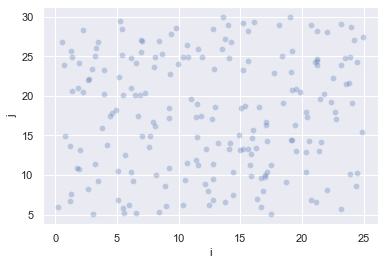

In [4]:
# fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df,x='i', y='j', alpha=0.3)


2 groups i and j. you want 2 clusters
you want to assign each point to a cluster
algorithm will make 2 groups
plot data
based on 2 data points, calculate euclidean distance and assign the closest point to the cluster

mahalanobis for 3 ds 


<AxesSubplot:xlabel='i', ylabel='j'>

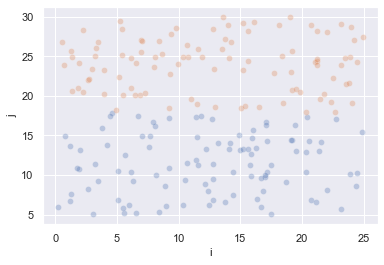

In [5]:
#using package to compare

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
df['sk_label'] = kmeans.labels_

sns.scatterplot(data=df[df.sk_label == 0],x='i', y='j', alpha=0.3)
sns.scatterplot(data=df[df.sk_label == 1],x='i', y='j', alpha=0.3)


In [6]:
def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array((df.sample().values[0][0], df.sample().values[0][1]))
        centroids.append(c)
    return centroids
        

In [7]:
def dist(x,y): 
    return np.linalg.norm(x - y) 


In [8]:
def assign_clusters(d, n):
    centroids = get_centroids(d,n)
    assignments = []
    for x in d[['i','j']].to_numpy():
        distances = [dist(x,c) for c in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

<AxesSubplot:xlabel='i', ylabel='j'>

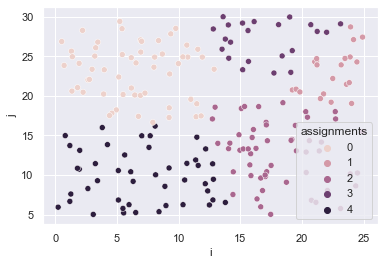

In [9]:
# implementation of 1 run with 5 clusters:
assigned_df = assign_clusters(df,5)
sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments')